<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/04_Transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning fine tuning
In this project we use food dataset (10 classes) and pretrained on imagenet models. We use new technics as:
- Functional API
- image_dataset_from_directory

*note* this notebook was created with Colab, path links can be different if you run it on Jupyter

### Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

In [3]:
# Get helper functions from my GitHub account.
!wget 'https://raw.githubusercontent.com/Natali-bali/TensorFlow_Tutorial/master/helper_functions.py'

--2021-06-20 09:38:46--  https://raw.githubusercontent.com/Natali-bali/TensorFlow_Tutorial/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9014 (8.8K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   8.80K  --.-KB/s    in 0s      

2021-06-20 09:38:46 (71.4 MB/s) - ‘helper_functions.py’ saved [9014/9014]



In [4]:
#Download Data(10% from food pictures)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

--2021-06-20 09:38:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   241MB/s    in 0.7s    

2021-06-20 09:38:47 (241 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
from helper_functions import unzip_file, plot_pictures, classes_names, walk_through_dir, plot_loss_curves, create_tf_board_callback

In [6]:
unzip_file('/content/10_food_classes_10_percent.zip')

In [7]:
dir_name = '/content/10_food_classes_10_percent'
dir_train = '/content/10_food_classes_10_percent/train'
dir_test = '/content/10_food_classes_10_percent/test'

### Inspect folders

In [8]:
walk_through_dir(dir_name)

There are 2 directories, 0 files in /content/10_food_classes_10_percent
There are 10 directories, 0 files in /content/10_food_classes_10_percent/train
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/chicken_curry
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/pizza
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/steak
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/sushi
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/fried_rice
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/grilled_salmon
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/chicken_wings
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/ramen
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/ice_cream
There are 0 directories, 75 files in /content/10_f

### Check classes names

In [9]:
classes_names = classes_names(dir_test)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### Plot random pictures for each class

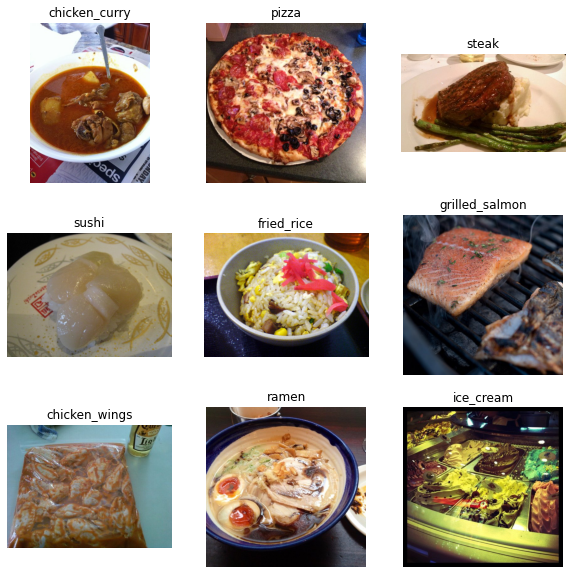

In [10]:
plot_pictures(dir_train)

### Image Dataset from directory
Now instead of ImageDataGenerator we will use new method
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

tf.keras.preprocessing.image_dataset_from_directory

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [12]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

In [12]:
train_data = image_dataset_from_directory(dir_train, 
                                          labels = 'inferred', 
                                          image_size = IMG_SIZE,
                                          batch_size = BATCH_SIZE,
                                          label_mode = 'categorical')
test_data = image_dataset_from_directory(dir_test, 
                                          labels = 'inferred', 
                                         image_size = IMG_SIZE,
                                          batch_size = BATCH_SIZE,
                                          label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [13]:
train_data
#It has different dimentions, None = batch size

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [14]:
len(train_data)

24

### Check classes(new option)

In [15]:
classes_names = train_data.class_names
classes_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### See an example of batch data

In [16]:
#for images, labels in train_data.take(1):
  #for image, label in zip(images, labels):
    #print(image)

### Build first model from applications tf.keras.applications.efficientnet.EfficientNetB0(
  

In [17]:
K.clear_session()

In [13]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, decode_predictions

In [19]:
model_1 = EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None,
                          input_shape=None, pooling=None, classes=1000,
                          classifier_activation='softmax')

21839872/21834768 [==============================] - 0s 0us/step


### Make predictions

In [20]:
for images, labels in train_data.take(1):
  for image, label in zip(images, labels):
    pred = model_1.predict(tf.expand_dims(image, axis = 0))
    print('Predicted:', decode_predictions(pred, top=1)[0])
    print('Real:', classes_names[tf.argmax(np.array(label))])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n07579787', 'plate', 0.18376587)]
Real: sushi
Predicted: [('n07871810', 'meat_loaf', 0.470818)]
Real: steak
Predicted: [('n07590611', 'hot_pot', 0.33469447)]
Real: chicken_curry
Predicted: [('n07873807', 'pizza', 0.4297057)]
Real: pizza
Predicted: [('n07614500', 'ice_cream', 0.24176067)]
Real: ice_cream
Predicted: [('n07836838', 'chocolate_sauce', 0.37690538)]
Real: steak
Predicted: [('n07579787', 'plate', 0.65310544)]
Real: steak
Predicted: [('n07697313', 'cheeseburger', 0.27640948)]
Real: hamburger
Predicted: [('n07614500', 'ice_cream', 0.5997285)]
Real: ice_cream
Predicted: [('n07880968', 'burrito', 0.2860164)]
Real: fried_rice
Predicted: [('n07579787', 'plate', 0.29444417)]
Real: fried_rice
Predicted: [('n07714990', 'broccoli', 0.27784804)]
Real: grilled_salmon
Predicted: [('n07873807', 'pizza', 0.3767553)]
Real: pizza
Predicted: [('n07875152', 'potpie', 0.16941589)]
Real: fried_rice
Predicted: [('n0757978

### Build second model (from tutorial)

In [21]:
K.clear_session()

In [22]:
base_model = EfficientNetB0(include_top=False)

16711680/16705208 [==============================] - 1s 0us/step


In [23]:
# Freeze base_model layers, so they are not trainable
base_model.trainable = False

In [24]:
# Create inputs 
inputs = tf.keras.layers.Input(shape=(224,224,3), name = 'input_layer')

In [25]:
# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

In [26]:
#pass inputs to base model using functionl API
x = base_model(inputs)

In [27]:
print(x.shape)

(None, 7, 7, 1280)


In [28]:
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)
x.shape

TensorShape([None, 1280])

In [29]:
#Add output layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

In [30]:
x.shape

TensorShape([None, 1280])

In [31]:
model_2 = tf.keras.Model(inputs, outputs)

In [32]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history_2 = model_2.fit(train_data, epochs = 5, validation_data = test_data, steps_per_epoch=len(train_data), validation_steps=int(0.25*len(test_data))) 

Epoch 1/5
24/24 [==============================] - 70s 3s/step - loss: 1.9458 - accuracy: 0.3613 - val_loss: 1.3681 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 63s 3s/step - loss: 1.1828 - accuracy: 0.7267 - val_loss: 0.9552 - val_accuracy: 0.7845
Epoch 3/5
24/24 [==============================] - 63s 3s/step - loss: 0.8754 - accuracy: 0.7880 - val_loss: 0.7789 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 63s 3s/step - loss: 0.7063 - accuracy: 0.8253 - val_loss: 0.6574 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 63s 3s/step - loss: 0.6127 - accuracy: 0.8507 - val_loss: 0.6117 - val_accuracy: 0.8372


### Evaluate model

In [34]:
model_2.evaluate(test_data)

79/79 [==============================] - 115s 1s/step - loss: 0.6204 - accuracy: 0.8392


[0.6204079389572144, 0.8392000198364258]

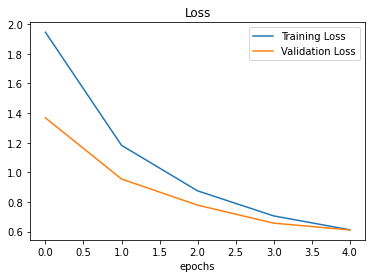

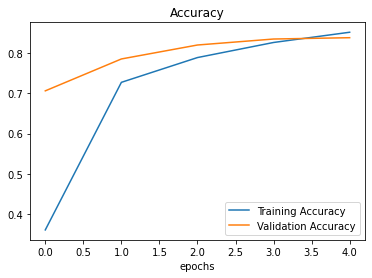

In [35]:
plot_loss_curves(history_2)

### Check our model arcitecture 

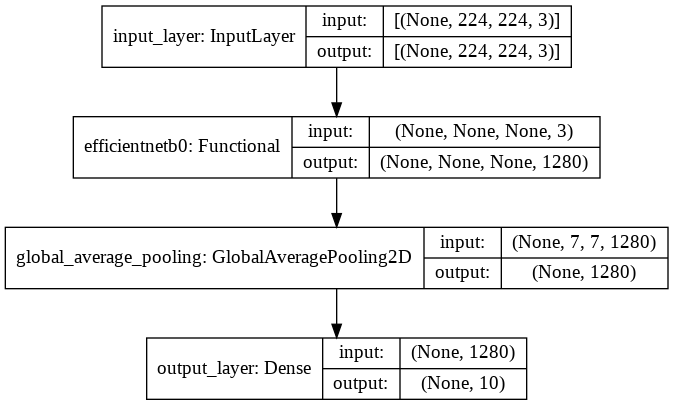

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)


In [37]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

### Check predictions

In [38]:
for images, labels in test_data.take(1):
  for image, label in zip(images, labels):
    pred = model_2.predict(tf.expand_dims(image, axis = 0))    
    print('Predicted:', classes_names[tf.argmax(pred[0])])
    print('Real:', classes_names[tf.argmax(np.array(label))])

Predicted: chicken_curry
Real: fried_rice
Predicted: steak
Real: steak
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: grilled_salmon
Real: chicken_curry
Predicted: steak
Real: chicken_curry
Predicted: chicken_wings
Real: chicken_wings
Predicted: chicken_curry
Real: chicken_curry
Predicted: sushi
Real: sushi
Predicted: hamburger
Real: hamburger
Predicted: chicken_curry
Real: chicken_curry
Predicted: hamburger
Real: hamburger
Predicted: ramen
Real: ramen
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: steak
Real: steak
Predicted: grilled_salmon
Real: hamburger
Predicted: steak
Real: hamburger
Predicted: hamburger
Real: hamburger
Predicted: chicken_curry
Real: chicken_curry
Predicted: chicken_wings
Real: chicken_wings
Predicted: pizza
Real: chicken_curry
Predicted: pizza
Real: pizza
Predicted: ice_cream
Real: sushi
Predicted: chicken_curry
Real: sushi
Predicted: ice_cream
Real: ice_cream
Predicted: grilled_salmon
Real: ha

In [39]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


### Understanding GlobalAveragePooling2D layer

In [40]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


We can see the tf.keras.layers.GlobalAveragePooling2D() layer condensed the input tensor from shape (1, 4, 4, 3) to (1, 3). It did so by averaging the input_tensor across the middle two axes.


We can replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also condenses the information found by the base model into a lower dimension feature vector.


🔑 Note: One of the reasons feature extraction transfer learning is named how it is is because what often happens is a pretrained model outputs a feature vector (a long tensor of numbers, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of.


🛠 Practice: Do the same as the above cell but for tf.keras.layers.GlobalMaxPool2D().

In [41]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [42]:
# Pass the random tensor through a global Max pooling 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D global max pooled random tensor:\n {global_max_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_max_pooled_tensor.shape}")

2D global max pooled random tensor:
 [[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


### Try model with GlobalMaxPoll2D

In [43]:
x = base_model(inputs)
x = tf.keras.layers.GlobalMaxPool2D(name = 'global_max_pool_2D')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output')(x)
model_3 = tf.keras.Model(inputs, outputs)

In [44]:
model_3.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [45]:
model_3.fit(train_data, epochs = 5, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=int(.25*len(test_data)))

Epoch 1/5
24/24 [==============================] - 69s 3s/step - loss: 3.8927 - accuracy: 0.2440 - val_loss: 2.1886 - val_accuracy: 0.4326
Epoch 2/5
24/24 [==============================] - 64s 3s/step - loss: 1.5791 - accuracy: 0.5627 - val_loss: 1.4216 - val_accuracy: 0.5987
Epoch 3/5
24/24 [==============================] - 65s 3s/step - loss: 1.0671 - accuracy: 0.6920 - val_loss: 1.1744 - val_accuracy: 0.6628
Epoch 4/5
24/24 [==============================] - 65s 3s/step - loss: 0.7744 - accuracy: 0.7733 - val_loss: 1.1580 - val_accuracy: 0.6941
Epoch 5/5
24/24 [==============================] - 66s 3s/step - loss: 0.6542 - accuracy: 0.8013 - val_loss: 1.1368 - val_accuracy: 0.7105


### Running a series of transfer learning experiments
We've seen the incredible results of transfer learning on 10% of the training data, what about 1% of the training data?


We will run the following modelling experiments:
- model_4: Use feature extraction transfer learning on 1% of the training data with data augmentation.
- model_5: Use feature extraction transfer learning on 10% of the training data with data augmentation.
- model_6: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
- model_7: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

While all of the experiments will be run on different versions of the training data, they will all be evaluated on the same test dataset, this ensures the results of each experiment are as comparable as possible.


All experiments will be done using the EfficientNetB0 model within the tf.keras.applications module.

To make sure we're keeping track of our experiments, we'll use our create_tensorboard_callback() function to log all of the model training logs.


We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the ImageDataGenerator class as we have previously, we're going to build it right into the model using the tf.keras.layers.experimental.preprocessing module.

### Downloading and unzip 1% data

In [14]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-06-20 09:39:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   176MB/s    in 0.7s    

2021-06-20 09:39:50 (176 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
unzip_file('/content/10_food_classes_1_percent.zip')

### Inspect directories

In [16]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories, 0 files in /content/10_food_classes_1_percent
There are 10 directories, 0 files in /content/10_food_classes_1_percent/train
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/chicken_curry
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/pizza
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/steak
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/sushi
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/fried_rice
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/grilled_salmon
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/chicken_wings
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/ramen
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/ice_cream
There are 0 directories, 7 files in /content/10_food_classes_1_percent

In [17]:
dir_train_1 = '/content/10_food_classes_1_percent/train'
dir_test = '/content/10_food_classes_1_percent/test'

### Get train/test data ready. Preprocess train data with augmentation

In [18]:
train_data_1 = image_dataset_from_directory(dir_train_1, image_size = IMG_SIZE, label_mode = 'categorical', batch_size=BATCH_SIZE)
test_data = image_dataset_from_directory(dir_test, label_mode='categorical', image_size=IMG_SIZE, batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Create model_4 (1% Data with augmentation)

In [19]:
K.clear_session()

In [20]:
base_model = EfficientNetB0(include_top=False)
base_model.trainable = False

16711680/16705208 [==============================] - 0s 0us/step


In [21]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
#We can use this sintax
# flip_layer = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
# rotation_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
gap_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')
outputs = tf.keras.layers.Dense(10, activation='softmax')

In [48]:
#Or we can create Sequential layer for augmentation
augmentation_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)

In [25]:
x = base_model(inputs)
#x = flip_layer(x)
#x = rotation_layer(x)
augmentation_layer(x)
x = gap_layer(x)
outputs = outputs(x)

In [26]:
model_4 = tf.keras.Model(inputs, outputs)

In [27]:
#Create tensorboard callback function. I dublicate function, because it had a bug from our helper file and 
#i didnt want to restart all notebook. Now the bug is fixed
import datetime
def create_tf_board_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving TensorBoard log files to {log_dir}')
  return tensorflow_callback
tf_board_1 = create_tf_board_callback('food_classification_efficientNetB0', '1%_data_augmented')

Saving TensorBoard log files to food_classification_efficientNetB0/1%_data_augmented/20210620-094106


In [28]:
model_4.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [29]:
model_4.fit(train_data_1, epochs = 5, callbacks=[tf_board_1], steps_per_epoch=len(train_data_1),
            validation_data = test_data, validation_steps = len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 45s 5s/step - loss: 2.3271 - accuracy: 0.0857 - val_loss: 2.1640 - val_accuracy: 0.1892
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 2.0249 - accuracy: 0.3000 - val_loss: 2.0237 - val_accuracy: 0.2836
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 1.8058 - accuracy: 0.5429 - val_loss: 1.9062 - val_accuracy: 0.3600
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 1.6117 - accuracy: 0.6286 - val_loss: 1.8037 - val_accuracy: 0.4188
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 1.4294 - accuracy: 0.7714 - val_loss: 1.7088 - val_accuracy: 0.4760


### Plot augmented pictures

In [86]:
import random
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_pictures(path, rows_num = 10):
    dir_names = listdir(path)
    plt.figure(figsize=(10,20))
    for dir_name, num in zip(dir_names, range(1, 2*len(dir_names)-1, 2)):
        files_names = listdir(path + '/' + dir_name)
        
        random_img = mpimg.imread(path + '/'+dir_name + '/' + random.choice(files_names))
        augmented_img = augmentation_layer(tf.expand_dims(random_img, axis=0)) 
        
        plt.subplot(rows_num, 2, num)
        plt.imshow(tf.squeeze(augmented_img)/255.)
        plt.title(dir_name)
        plt.axis('off')
        plt.subplot(rows_num, 2, num+1)
        plt.imshow(random_img/255.)
        plt.title(dir_name)
        plt.axis('off')


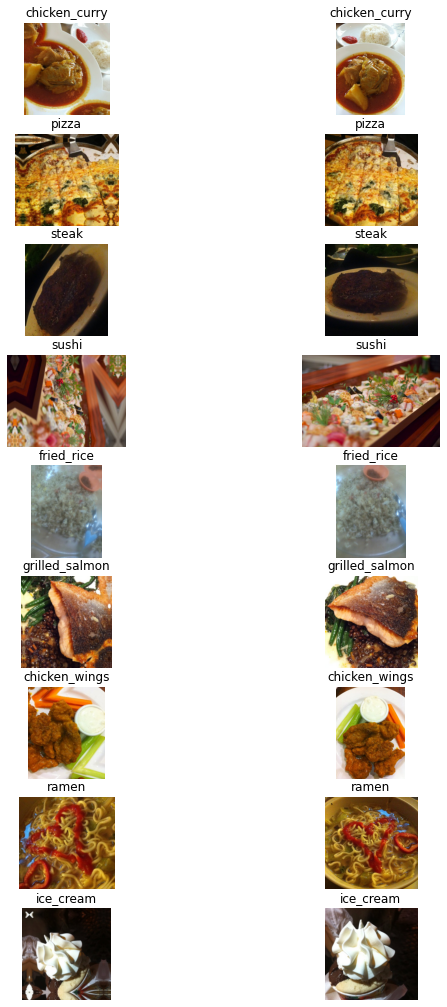

In [87]:
plot_pictures('/content/10_food_classes_1_percent/train', rows_num = 10)

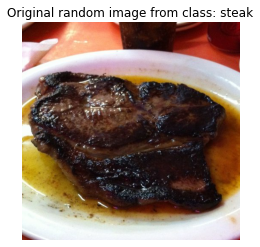

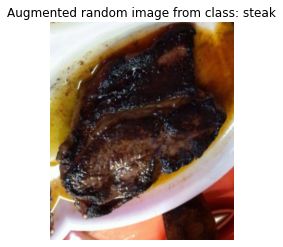